# TEMPLATE 

  Training, and  Testing.  Measures of perfomance.
  Evaluation of a classification pipeline: standard scaler and perceptron.
  

In [17]:
#numeric: pandas and numpy
import numpy as np
import pandas as pd
# graphics
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 

# Toy Data

Starting with toy data to understand the main characteristics of the models. 
1. Creating artificial data with two characteristics 
    might be useful.

Scikit- learn provides also data sets with real data and all of them are avalaible and easily download and written in the proper formats 

https://scikit-learn.org/stable/datasets/index.html

In [18]:
from sklearn.datasets import make_blobs, make_circles, make_moons, make_circles

X_blobs, y_blobs = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=None)

X_moon,y_moon= make_moons(n_samples=1000, shuffle=True, noise=None, random_state=None)

X_cir, y_cir= make_circles(n_samples=1000, shuffle=True, noise=None, random_state=None, factor=0.4)

In [19]:
print(np.unique(y_blobs))

[0 1]


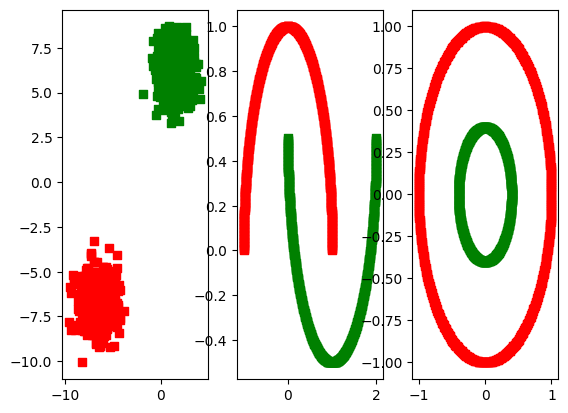

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.scatter(X_blobs[y_blobs==0,0],X_blobs[y_blobs==0,1],marker='s',color='r',label='0' )
ax1.scatter(X_blobs[y_blobs==1,0],X_blobs[y_blobs==1,1],marker='s',color='g',label='0' )
#ax1.set_aspect('equal')
ax2.scatter(X_moon[y_moon==0,0],X_moon[y_moon==0,1],marker='s',color='r',label='0' )
ax2.scatter(X_moon[y_moon==1,0],X_moon[y_moon==1,1],marker='s',color='g',label='0' )

ax3.scatter(X_cir[y_cir==0,0],X_cir[y_cir==0,1],marker='s',color='r',label='0' )
ax3.scatter(X_cir[y_cir==1,0],X_cir[y_cir==1,1],marker='s',color='g',label='0' )
plt.show()

# Model  Evaluation
Read the section 4.5 (4.5.1 and 4.5.3)

Tan , Steinback and Kumar: Introduction to Data Mining

**or** the following  technical report

https://arxiv.org/abs/1811.12808


The following code introduces the main steps of the most used strategies to evaluate a model

### Learning  and testing

In [21]:
# The Data set
X=X_moon
y=y_moon

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Strategy of Evaluation I:  Train and Test with hold-out

Aplicable if the data set is large.

In [23]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)
    
    
    

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   
Xtrain_scal=scaler.fit_transform(X_train)

Xtest_scal=scaler.transform(X_test)
    

In [25]:
from sklearn.linear_model import Perceptron
#Create perceptron and assign hyperparameters (max_iter, eta0- learning rate)
ppn=Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=20, tol=None, 
               eta0=0.1, n_jobs=1, random_state=0, class_weight=None, warm_start=False)

#Learning
ppn.fit(Xtrain_scal,y_train)



Perceptron(eta0=0.1, max_iter=20, n_jobs=1, tol=None)

In [26]:
y_pred=ppn.predict(Xtest_scal)
cf_M = confusion_matrix(y_test,y_pred, labels=[1,0])
print(cf_M)

[[130  64]
 [  9 197]]


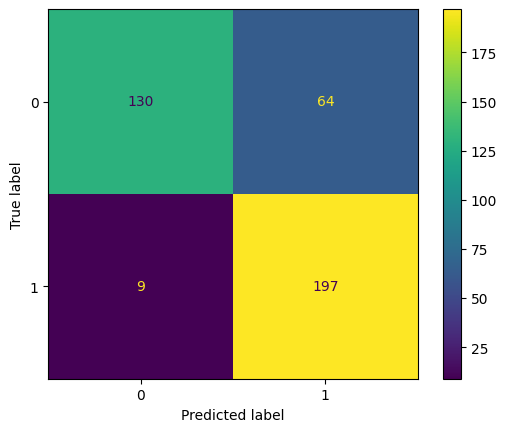

accuracy= 0.8175
precision= 0.935251798561151
recall= 0.6701030927835051
F1= 0.7807807807807807


In [27]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf_M)
disp.plot()
plt.show()

#use disp values to calculate accuracy, precision, recall, F1
accuracy=(cf_M[0,0]+cf_M[1,1])/np.sum(cf_M)
precision=cf_M[0,0]/(cf_M[0,0]+cf_M[1,0])
recall=cf_M[0,0]/(cf_M[0,0]+cf_M[0,1])
F1=2*precision*recall/(precision+recall)
print('accuracy=',accuracy)
print('precision=',precision)
print('recall=',recall)
print('F1=',F1)



### Exercise: 
1. Try to understand the contents of the confusion matrix . Describe each of the entries by your own words
2. Using the confusion matrix estimate: accuracy, recall, precision  
3. Use the other facilities of the package sklearn.metrics to estimate the scores.


In [28]:
#1 Try to understand the contents of the confusion matrix . Describe each of the entries by your own words
#R: 183 são os verdadeiros positivos, 33 são falsos negativos, 24 são  falsos positivos e  160 são verdadeiros negativos.
#R: Ou seja 183 são os valores que foram classificados corretamente como positivos, 33 são os valores que foram classificados incorretamente como negativos, 24 são os valores que foram classificados incorretamente como positivos e 160 são os valores que foram classificados corretamente como negativos.
#2 Using the confusion matrix estimate: accuracy, recall, precision  
#R:
accuracy=(cf_M[0,0]+cf_M[1,1])/np.sum(cf_M)
precision=cf_M[0,0]/(cf_M[0,0]+cf_M[1,0])
recall=cf_M[0,0]/(cf_M[0,0]+cf_M[0,1])
print('accuracy=',accuracy)
print('precision=',precision)
print('recall=',recall)
#3 Use the other facilities of the package sklearn.metrics to estimate the scores.
#R:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('accuracy=',accuracy_score(y_test,y_pred))
print('precision=',precision_score(y_test,y_pred))
print('recall=',recall_score(y_test,y_pred))


accuracy= 0.8175
precision= 0.935251798561151
recall= 0.6701030927835051
accuracy= 0.8175
precision= 0.935251798561151
recall= 0.6701030927835051


# Strategy of Evaluation II:  K-fold train and test


The most widely used strategy to evalaute a classifier when the data set is not long enough

In [29]:
from sklearn.model_selection import StratifiedKFold



    

In [30]:
ppn=Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=20, tol=None, 
               eta0=0.1, n_jobs=1, random_state=0, class_weight=None, warm_start=False)

#### pre-processing included in the classification pipeline
##### 5-fold cross-validation.

In [31]:
k_fold = StratifiedKFold(n_splits=5)
for train_indices, test_indices in k_fold.split(X,y):
    scaler = StandardScaler() 
    X_train=X[train_indices]
   
    Xs=scaler.fit_transform(X_train)

    Xtest=scaler.transform(X[test_indices])
    
    ppn.fit(Xs,y[train_indices])
    
    y_pred=ppn.predict(Xtest)
    print(confusion_matrix(y[test_indices],y_pred))
    
    

[[99  1]
 [19 81]]
[[100   0]
 [ 38  62]]
[[88 12]
 [14 86]]
[[99  1]
 [33 67]]
[[84 16]
 [12 88]]


### Exercise: introduce in the loop  the calculation of scores using the facilities of the package sklearn.metrics


In [32]:
# introduce in the loop  the calculation of scores using the facilities of the package sklearn.metrics

#R:
from sklearn.metrics import accuracy_score, precision_score, recall_score
for train_indices, test_indices in k_fold.split(X,y):
    scaler = StandardScaler() 
    X_train=X[train_indices]
   
    Xs=scaler.fit_transform(X_train)

    Xtest=scaler.transform(X[test_indices])
    
    ppn.fit(Xs,y[train_indices])
    
    y_pred=ppn.predict(Xtest)
    print('accuracy=',accuracy_score(y[test_indices],y_pred))
    print('precision=',precision_score(y[test_indices],y_pred))
    print('recall=',recall_score(y[test_indices],y_pred))
    

accuracy= 0.9
precision= 0.9878048780487805
recall= 0.81
accuracy= 0.81
precision= 1.0
recall= 0.62
accuracy= 0.87
precision= 0.8775510204081632
recall= 0.86
accuracy= 0.83
precision= 0.9852941176470589
recall= 0.67
accuracy= 0.86
precision= 0.8461538461538461
recall= 0.88
